In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import os
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader,random_split
import torch.nn as nn
import pytorch_lightning as pl
import torch.nn.functional as F
from torch import optim
from pytorch_lightning.core import LightningModule
from pytorch_lightning.metrics.functional import  accuracy 
from pytorch_lightning import loggers as pl_loggers
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
from pandas_profiling import ProfileReport
import seaborn as sns


C:\Users\mohamedr002\Anaconda3\envs\phd\lib\site-packages\pytorch_lightning\utilities\distributed.py:37: UserWarning: Unsupported `ReduceOp` for distributed computing.
  warnings.warn(*args, **kwargs)


# Data Description 

In [2]:
# Reading phones accelemeter datasets 
data_dir = r"D:\My TS Datasets\HAR_Datasets\WISDM_ar\WISDM_ar_v1.1"
wisdom_refined = pd.read_csv(f'{data_dir}/Wisdom_ar.csv')
wisdom_refined.head()

,user,x,y,z,labels
0,33,-0.694638,12.680544,0.503953,1
1,33,5.012288,11.264028,0.953424,1
2,33,4.903325,10.882658,-0.081722,1
3,33,-0.612916,18.496431,3.023717,1
4,33,-1.184970,12.108489,7.205164,1


## Dropping irrelevant columns and removing nulls 

## Analyze user-based data 

In [6]:
selected_users = wisdom_refined.loc[wisdom_refined['user'].isin([7,18,20,30,31,35,23,6,19])]

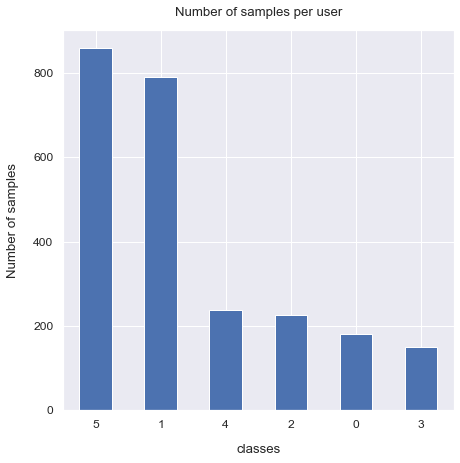

In [16]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.1)
counts_class = selected_users['labels'].value_counts()//128
counts_class.plot(kind='bar', figsize=(7, 7), rot=0)
plt.xlabel("classes", labelpad=14)
plt.ylabel("Number of samples", labelpad=14)
plt.title("Number of samples per user", y=1.02);

In [ ]:
# Plotting in subplopts the number of samples per each user per class 

In [7]:
selected_users[selected_users.user==35]['labels'].value_counts( dropna=False)//128


1    98
5    55
2    12
3     8
Name: labels, dtype: int64

In [8]:
ff = selected_users[selected_users.user==35]['labels'].tolist()#.value_counts( dropna=False)//128
d= {i:ff.count(i)//128 for i in range(6)}
pd.Series(d)

# [ff.count(i)//128 for i in range(6)]
# pd.DataFrame.from_dict(d,index=[0])
# df = pd.DataFrame(d, index=[0])


0     0
1    98
2    12
3     8
4     0
5    55
dtype: int64

## Class Distriubtion per each user  

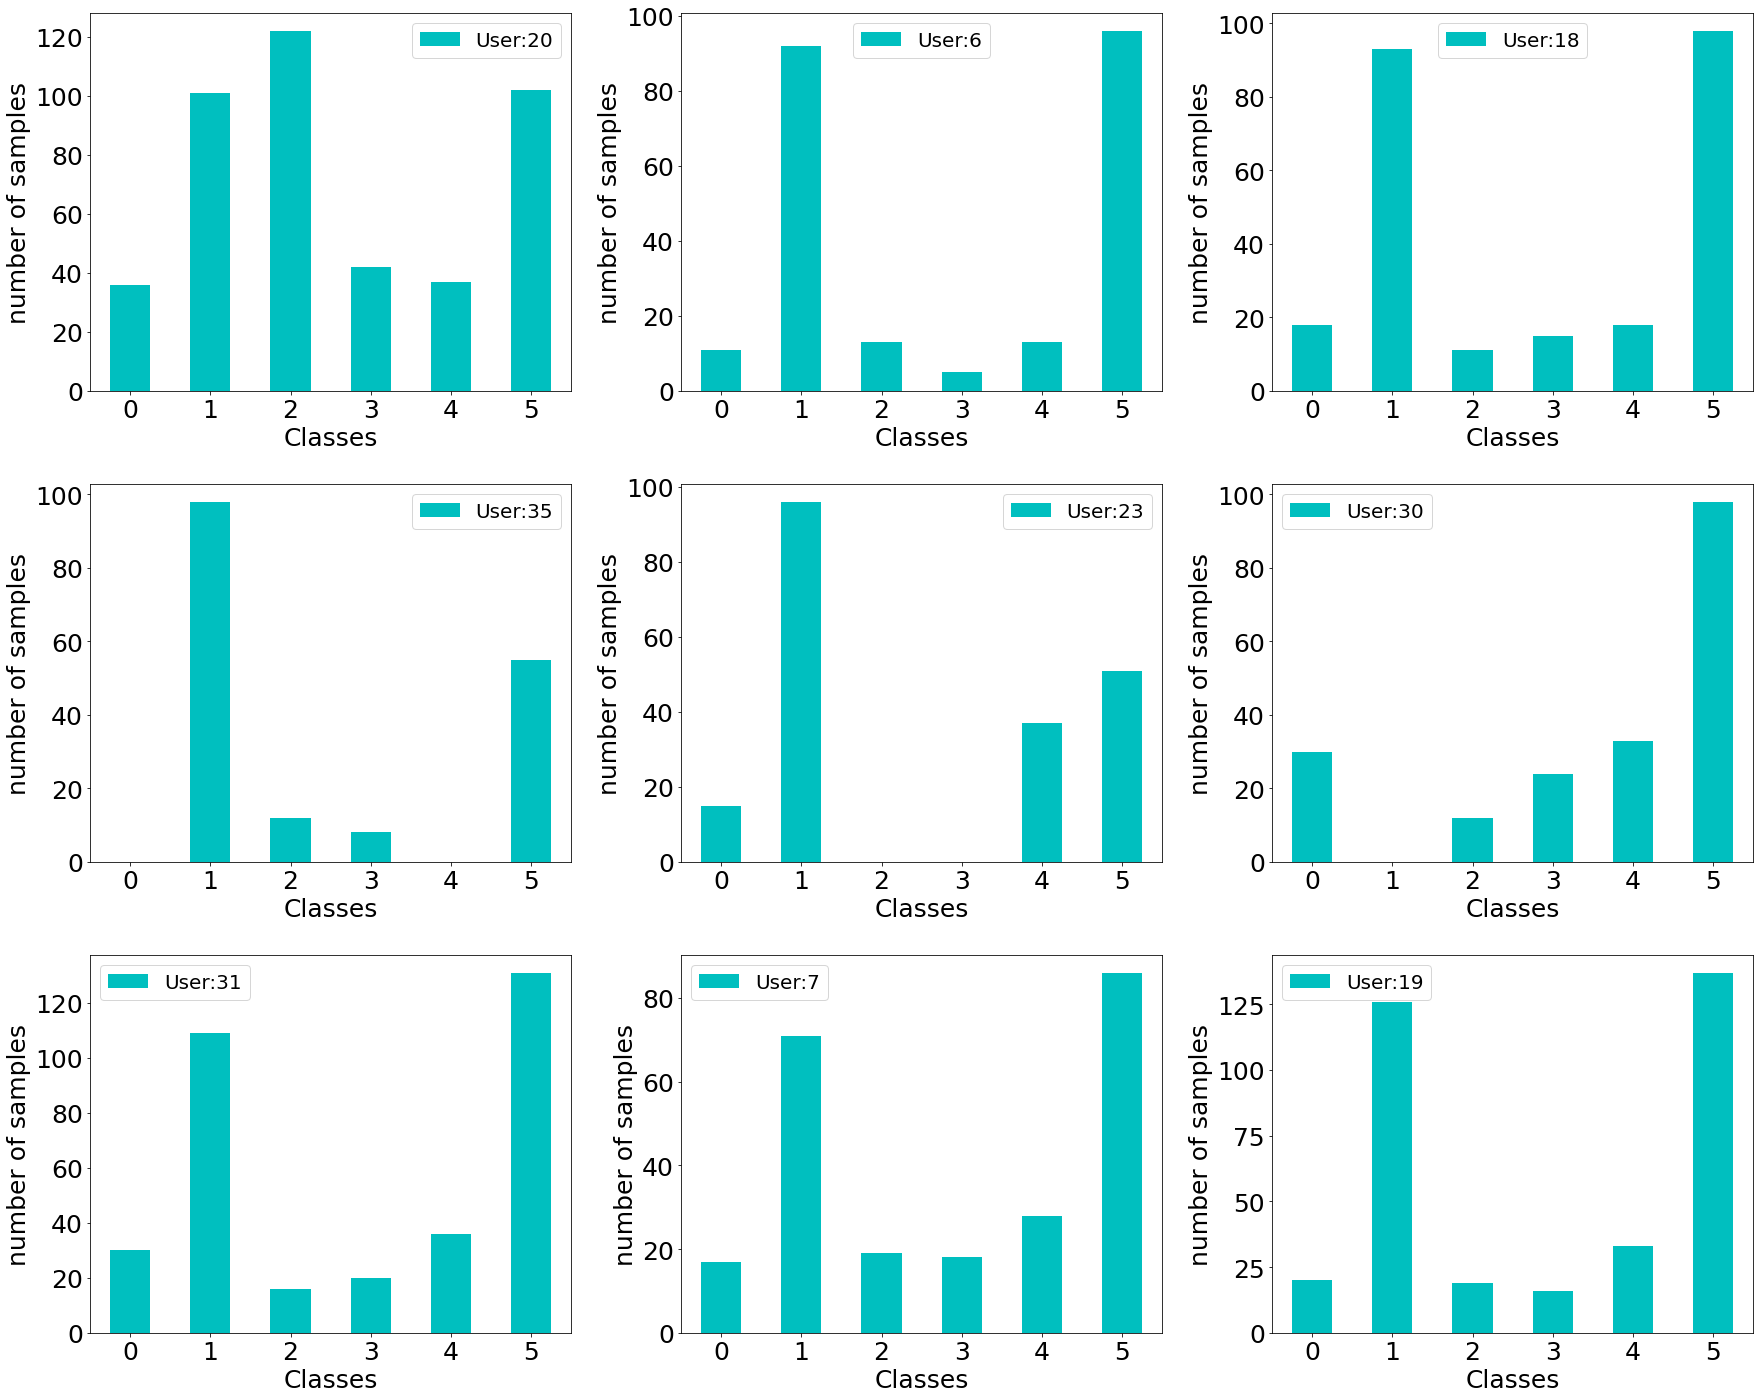

In [10]:
fig=plt.figure(figsize=(25,20))
plt.rcParams.update({'font.size': 25})
plt.title('Class distriubtion among users')

# markers=[',', '+', 'o', '.']
j=1
for i in selected_users.user.unique():
    plt.subplot(3,3,j)
    ff = selected_users[selected_users.user==i]['labels'].tolist()#.value_counts( dropna=False)//128
    d= {i:ff.count(i)//128 for i in range(6)}
    counts= pd.Series(d)
#     counts = selected_users[selected_users.user==i]['labels'].value_counts()//128
    counts.plot(kind='bar', label=f"User:{i}", color='c', rot=0)
    plt.xlabel('Classes')
    plt.ylabel('number of samples')
#     plt.plot(classes)
    plt.legend(prop={'size': 20})
    j+=1
plt.tight_layout()
plt.savefig('wisdom_distriubtion.pdf')
plt.show()

In [14]:
ProfileReport(HHAR_phones_refined)